In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv('autos.csv')

head() - первые пять строк

In [6]:
print("\na) head() - первые 5 строк:")
print(df.head())  


a) head() - первые 5 строк:
           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TЬRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType   

tail() - последние пять строк:

In [7]:
print("\nb) tail() - последние 5 строк:")
print(df.tail())  


b) tail() - последние 5 строк:
                dateCrawled                                          name  \
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilomet

info() - информация о DataFrame

In [8]:
print("\nc) info() - информация о DataFrame:")
print(df.info())  


c) info() - информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 1

describe() - описательная статистика

In [9]:
print("\nd) describe() - описательная статистика:")
print(df.describe(include='all'))  


d) describe() - описательная статистика:
                dateCrawled         name  seller offerType         price  \
count                371528       371528  371528    371528  3.715280e+05   
unique               280500       233531       2         2           NaN   
top     2016-03-24 14:49:47  Ford_Fiesta  privat   Angebot           NaN   
freq                      7          657  371525    371516           NaN   
mean                    NaN          NaN     NaN       NaN  1.729514e+04   
std                     NaN          NaN     NaN       NaN  3.587954e+06   
min                     NaN          NaN     NaN       NaN  0.000000e+00   
25%                     NaN          NaN     NaN       NaN  1.150000e+03   
50%                     NaN          NaN     NaN       NaN  2.950000e+03   
75%                     NaN          NaN     NaN       NaN  7.200000e+03   
max                     NaN          NaN     NaN       NaN  2.147484e+09   

        abtest vehicleType  yearOfRegistratio

shape - размерность DataFrame

In [10]:
print("\ne) shape - размерность DataFrame:")
print(f"Форма DataFrame: {df.shape}")


e) shape - размерность DataFrame:
Форма DataFrame: (371528, 20)


Количество пустых значений по колонкам (по убыванию)

In [11]:
# a) Количество пустых значений по колонкам (по убыванию)
null_counts = df.isnull().sum().sort_values(ascending=False)
print("\na) Количество пустых значений по колонкам:")
print(null_counts) 


a) Количество пустых значений по колонкам:
notRepairedDamage      72060
vehicleType            37869
fuelType               33386
model                  20484
gearbox                20209
kilometer                  0
postalCode                 0
nrOfPictures               0
dateCreated                0
brand                      0
monthOfRegistration        0
dateCrawled                0
name                       0
powerPS                    0
yearOfRegistration         0
abtest                     0
price                      0
offerType                  0
seller                     0
lastSeen                   0
dtype: int64


Процент пустых значений по колонкам (по убыванию)

In [12]:
# b) Процент пустых значений по колонкам (по убыванию)
null_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
print("\nb) Процент пустых значений по колонкам:")
print(null_percent.round(2))  


b) Процент пустых значений по колонкам:
notRepairedDamage      19.40
vehicleType            10.19
fuelType                8.99
model                   5.51
gearbox                 5.44
kilometer               0.00
postalCode              0.00
nrOfPictures            0.00
dateCreated             0.00
brand                   0.00
monthOfRegistration     0.00
dateCrawled             0.00
name                    0.00
powerPS                 0.00
yearOfRegistration      0.00
abtest                  0.00
price                   0.00
offerType               0.00
seller                  0.00
lastSeen                0.00
dtype: float64


Вывод info до очистки

In [13]:
# c) Вывод info до очистки
print("\nc1) Info ДО очистки:")
df.info()


c1) Info ДО очистки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedD

In [14]:
# Очистка данных (удаление строк с пустыми значениями)
df_cleaned = df.dropna()

Вывод info после очистки

In [15]:
# Вывод info после очистки
print("\nc2) Info ПОСЛЕ очистки:")
df_cleaned.info()


c2) Info ПОСЛЕ очистки:
<class 'pandas.core.frame.DataFrame'>
Index: 260956 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          260956 non-null  object
 1   name                 260956 non-null  object
 2   seller               260956 non-null  object
 3   offerType            260956 non-null  object
 4   price                260956 non-null  int64 
 5   abtest               260956 non-null  object
 6   vehicleType          260956 non-null  object
 7   yearOfRegistration   260956 non-null  int64 
 8   gearbox              260956 non-null  object
 9   powerPS              260956 non-null  int64 
 10  model                260956 non-null  object
 11  kilometer            260956 non-null  int64 
 12  monthOfRegistration  260956 non-null  int64 
 13  fuelType             260956 non-null  object
 14  brand                260956 non-null  object
 15  notRepairedDam

In [16]:
# Количество строк до удаления дубликатов
rows_before = df.shape[0]
print(f"Количество строк до удаления дубликатов: {rows_before}")

Количество строк до удаления дубликатов: 371528


In [17]:
# Находим дубликаты
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Найдено дубликатов: {num_duplicates}")

Найдено дубликатов: 4


In [18]:
# Удаляем дубликаты
df_no_duplicates = df.drop_duplicates()

In [19]:
# Количество строк после удаления дубликатов
rows_after = df_no_duplicates.shape[0]
print(f"Количество строк после удаления дубликатов: {rows_after}")

Количество строк после удаления дубликатов: 371524


Задания по вариантам

1. Заполнение NaN в строковых полях

In [20]:
# 1. Заполнение NaN в строковых полях
string_cols = df.select_dtypes(include='object').columns
print(f"Строковые колонки для обработки: {list(string_cols)}")

Строковые колонки для обработки: ['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'lastSeen']


In [21]:
# Подсчет пропусков до заполнения
print("\nКоличество пропусков до заполнения:")
print(df[string_cols].isnull().sum())


Количество пропусков до заполнения:
dateCrawled              0
name                     0
seller                   0
offerType                0
abtest                   0
vehicleType          37869
gearbox              20209
model                20484
fuelType             33386
brand                    0
notRepairedDamage    72060
dateCreated              0
lastSeen                 0
dtype: int64


In [22]:
df = df.fillna('неизвестный')

In [23]:
# импутация для нескольких столбцов
def simple_fast_impute(df, columns):
    """Быстрая импутация медианой (альтернатива KNN)"""
    imputer = SimpleImputer(strategy='median')
    df[columns] = imputer.fit_transform(df[columns].replace(0, np.nan))
    return df

In [24]:
df = simple_fast_impute(df, ['price', 'powerPS'])

In [25]:
# Проверка после заполнения
print("\nРезультат после заполнения пропусков:")
print(df[string_cols].isnull().sum())


Результат после заполнения пропусков:
dateCrawled          0
name                 0
seller               0
offerType            0
abtest               0
vehicleType          0
gearbox              0
model                0
fuelType             0
brand                0
notRepairedDamage    0
dateCreated          0
lastSeen             0
dtype: int64


In [26]:
# Вывод примера заполненных данных
print("\nПример данных после заполнения:")
print(df[string_cols].head())


Пример данных после заполнения:
           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TЬRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

  abtest  vehicleType    gearbox        model fuelType       brand  \
0   test  неизвестный    manuell         golf   benzin  volkswagen   
1   test        coupe    manuell  неизвестный   diesel        audi   
2   test          suv  automatik        grand   diesel        jeep   
3   test   kleinwagen    manuell         golf   benzin  volkswagen   
4   test   kleinwagen    manuell        fabia   diesel       skoda   

  notRepairedDamage          dateCreated             lastSeen  
0       неизвестный  2016

2. Оценка диапазонов числовых значений

In [27]:
# 2. Оценка диапазонов числовых значений
# Выбираем числовые колонки для анализа
numeric_cols = ['yearOfRegistration', 'price', 'powerPS']

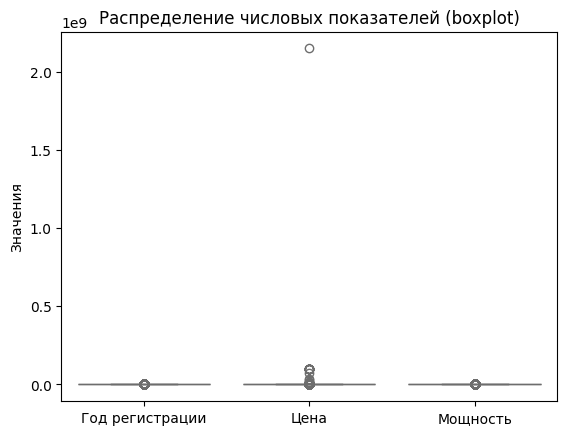

In [28]:
# Boxplot для всех числовых колонок сразу
sns.boxplot(data=df[numeric_cols], palette=['skyblue', 'lightgreen', 'salmon'])
plt.title('Распределение числовых показателей (boxplot)')
plt.xticks(ticks=[0, 1, 2], 
           labels=['Год регистрации', 'Цена', 'Мощность'])
plt.ylabel('Значения')
plt.show()

Видно большие выбросы по цене

3. Удаление выбросов

In [29]:
# 3. Удаление выбросов
print(f"Размер данных до удаления выбросов: {df.shape}")
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] >= q1 - 1.5*iqr) & (df[col] <= q3 + 1.5*iqr)]
print(f"Размер данных после удаления выбросов: {df.shape}")

Размер данных до удаления выбросов: (371528, 20)
Размер данных после удаления выбросов: (324612, 20)


Выбросы по цене не ушли, поэтому попробуем обрезать по границе

In [30]:
# Устанавливаем верхнюю границу для цены
price_upper_bound = 13600

In [31]:
# Фильтруем данные
start_count = df.shape[0]
df = df[df['price'] <= price_upper_bound] 
end_count = df.shape[0]
deleted_count = start_count - end_count

In [32]:
# Статистика после фильтрации
print(f"Статистика фильтрации по цене:")
print(f"Исходное количество записей: {start_count:,}")  
print(f"Оставшееся количество записей: {end_count:,}")
print(f"Удалено записей: {deleted_count:,} ({deleted_count/start_count:.1%})")
print(f"Максимальная цена после фильтрации: {df['price'].max():,.2f} руб.")  

Статистика фильтрации по цене:
Исходное количество записей: 324,612
Оставшееся количество записей: 317,334
Удалено записей: 7,278 (2.2%)
Максимальная цена после фильтрации: 13,600.00 руб.


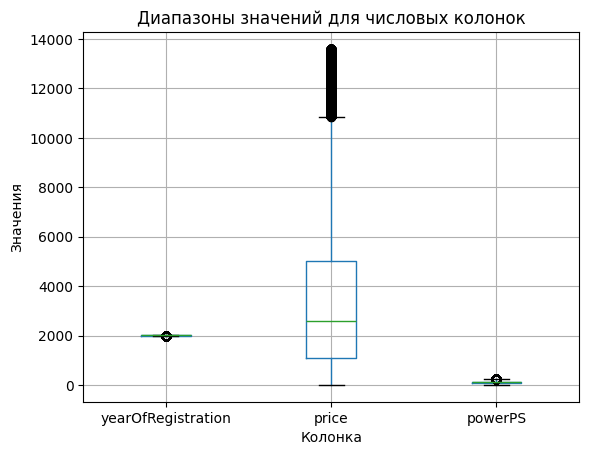

In [33]:
# ПОСЛЕ удаления выбросов
df.boxplot(column=['yearOfRegistration', 'price', 'powerPS'])
plt.title('Диапазоны значений для числовых колонок')
plt.ylabel('Значения')
plt.xlabel('Колонка')
plt.show()

Вроде бы почистили

4. Матрица корреляций

In [34]:
# 4. Матрица корреляций
# Выбираем нужные числовые столбцы
numeric_cols = ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']
corr_matrix = df[numeric_cols].corr()

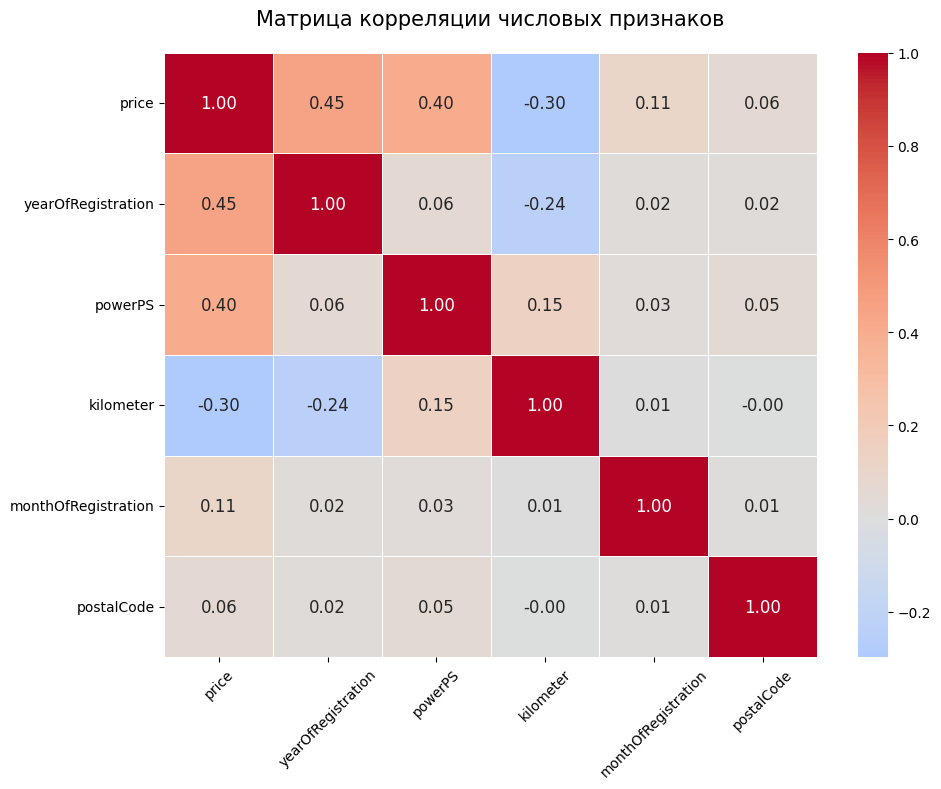

In [35]:
# Создаем таблицу корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            annot_kws={"size": 12})
plt.title('Матрица корреляции числовых признаков', pad=20, fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Корреляция как таковая есть только у price, yearOfRegistration, powerPS; Месяц регистрации и почтовый практически не оказывают влияния на итоговую цену автомобился, их можно удалить.

5. Удаление малоинформативных столбцов

In [36]:
# 5. Удаление малоинформативных столбцов
df.info()
cols_to_drop = ['monthOfRegistration', 'postalCode']
df = df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317334 entries, 0 to 371526
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          317334 non-null  object 
 1   name                 317334 non-null  object 
 2   seller               317334 non-null  object 
 3   offerType            317334 non-null  object 
 4   price                317334 non-null  float64
 5   abtest               317334 non-null  object 
 6   vehicleType          317334 non-null  object 
 7   yearOfRegistration   317334 non-null  int64  
 8   gearbox              317334 non-null  object 
 9   powerPS              317334 non-null  float64
 10  model                317334 non-null  object 
 11  kilometer            317334 non-null  int64  
 12  monthOfRegistration  317334 non-null  int64  
 13  fuelType             317334 non-null  object 
 14  brand                317334 non-null  object 
 15  notRepairedDamage    3

6. Гистограммы по категориям

In [37]:
# 6. Гистограммы по категориям
plt.figure(figsize=(15, 12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Text(0, 0.5, 'Количество')

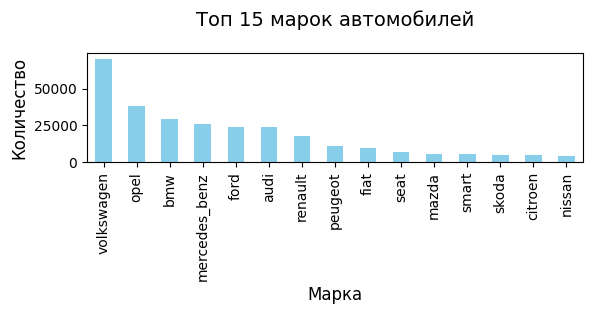

In [42]:
# Топ 15 марок автомобилей
plt.subplot(3, 1, 1)
brand_counts = df['brand'].value_counts().head(15)
brand_plot = brand_counts.plot(kind='bar', color='skyblue')
plt.title('Топ 15 марок автомобилей', fontsize=14, pad=20)
plt.xlabel('Марка', fontsize=12)
plt.ylabel('Количество', fontsize=12)



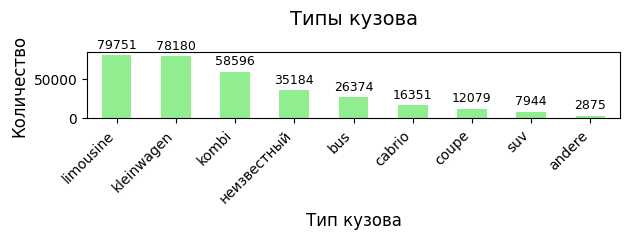

In [43]:
# Типы кузова
plt.subplot(3, 1, 2)
type_counts = df['vehicleType'].value_counts()
type_plot = type_counts.plot(kind='bar', color='lightgreen')
plt.title('Типы кузова', fontsize=14, pad=20)
plt.xlabel('Тип кузова', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавляем подписи значений над столбцами
for container in type_plot.containers:
    type_plot.bar_label(container, fmt='%d', padding=3, fontsize=9)

# Улучшаем читаемость подписей по оси X
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Чтобы избежать наложения элементов

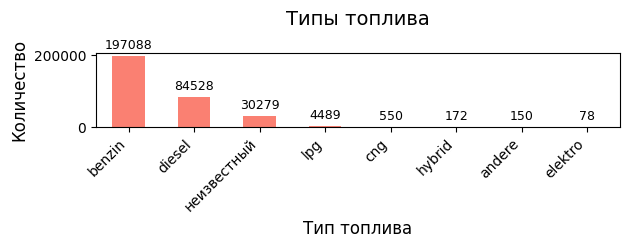

In [44]:
# Типы топлива
plt.subplot(3, 1, 3)
fuel_counts = df['fuelType'].value_counts()
fuel_plot = fuel_counts.plot(kind='bar', color='salmon')
plt.title('Типы топлива', fontsize=14, pad=20)
plt.xlabel('Тип топлива', fontsize=12)
plt.ylabel('Количество', fontsize=12)

# Добавляем подписи значений над столбцами
for container in fuel_plot.containers:
    fuel_plot.bar_label(container, fmt='%d', padding=3, fontsize=9)

# Улучшаем читаемость подписей
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Показываем все три графика вместе
plt.show()

7. Добавление нового признака

In [45]:
# 7. Добавление нового признака
df['name_length'] = df['name'].str.len()
print("Добавлен новый признак - длина названия автомобиля")
df.info()
df.head()

Добавлен новый признак - длина названия автомобиля
<class 'pandas.core.frame.DataFrame'>
Index: 317334 entries, 0 to 371526
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   dateCrawled         317334 non-null  object 
 1   name                317334 non-null  object 
 2   seller              317334 non-null  object 
 3   offerType           317334 non-null  object 
 4   price               317334 non-null  float64
 5   abtest              317334 non-null  object 
 6   vehicleType         317334 non-null  object 
 7   yearOfRegistration  317334 non-null  int64  
 8   gearbox             317334 non-null  object 
 9   powerPS             317334 non-null  float64
 10  model               317334 non-null  object 
 11  kilometer           317334 non-null  int64  
 12  fuelType            317334 non-null  object 
 13  brand               317334 non-null  object 
 14  notRepairedDamage   317334 non-null  o

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,lastSeen,name_length
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.0,test,неизвестный,1993,manuell,116.0,golf,150000,benzin,volkswagen,неизвестный,2016-03-24 00:00:00,0,2016-04-07 03:16:57,10
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004,automatik,163.0,grand,125000,diesel,jeep,неизвестный,2016-03-14 00:00:00,0,2016-04-05 12:47:46,30
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500.0,test,kleinwagen,2001,manuell,75.0,golf,150000,benzin,volkswagen,nein,2016-03-17 00:00:00,0,2016-03-17 17:40:17,18
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008,manuell,69.0,fabia,90000,diesel,skoda,nein,2016-03-31 00:00:00,0,2016-04-06 10:17:21,30
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995,manuell,102.0,3er,150000,benzin,bmw,ja,2016-04-04 00:00:00,0,2016-04-06 19:17:07,50


8. Корреляция цена-мощность

In [46]:
# 8. Корреляция цена-мощность
pearson_corr, pearson_p = stats.pearsonr(df['price'], df['powerPS'])
spearman_corr, spearman_p = stats.spearmanr(df['price'], df['powerPS'])

In [47]:
print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")
print(f"Коэффициент корреляции Спирмена: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Коэффициент корреляции Пирсона: 0.399, p-value: 0.000
Коэффициент корреляции Спирмена: 0.393, p-value: 0.000


Text(0.5, 1.0, 'Распределение цены')

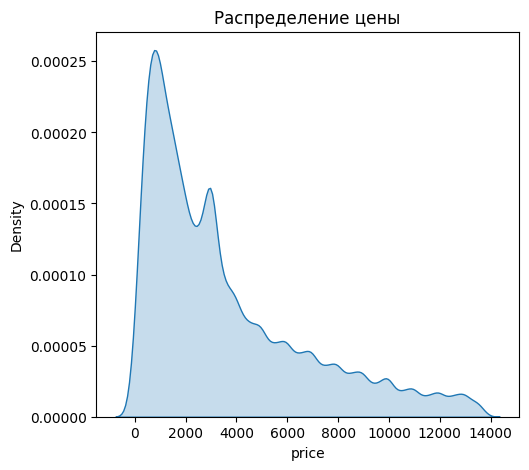

In [48]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(df['price'], fill=True)
plt.title('Распределение цены')

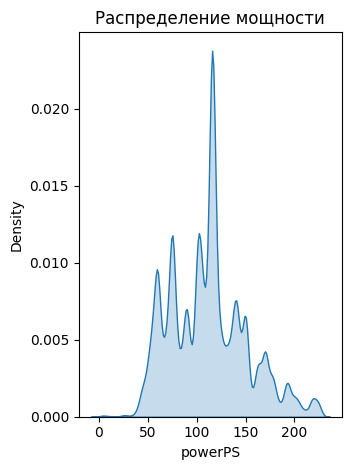

In [49]:
plt.subplot(1, 2, 2)
sns.kdeplot(df['powerPS'], fill=True)
plt.title('Распределение мощности')
plt.tight_layout()
plt.show()